<a href="https://colab.research.google.com/github/AbdKhuffash/Machine-Learning-Algorithms-KNN-Logistic-Regression-SVM-and-Ensemble-Methods/blob/main/MachineAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: KNN, Logistic Regression, SVM, and Ensemble Methods**

This case study demonstrates the implementation and evaluation of machine learning algorithms, including K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machines (SVM) with various kernels, and ensemble methods such as Boosting and Bagging, applied to a real-world classification dataset. It encompasses dataset preparation, algorithm experimentation, hyperparameter tuning, and model performance comparison using classification metrics.



## The Steps invlovles in this case study:
### **Setup and Data Loading**
* Importing libraries and loading the dataset.
---
### **K-Nearest Neighbors (KNN)**

* Implemented KNN with three distance metrics (Euclidean, Manhattan, and Cosine).
* Used cross-validation to determine the optimal number of neighbors (K).
* Evaluated performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

---

### **Logistic Regression**

* Trained Logistic Regression models with L1 and L2 regularization.
* Compared the results with KNN to highlight differences in performance.

---

### **Support Vector Machines (SVM)**

* Implemented SVM with three kernels: linear, polynomial, and RBF.
* Analyzed the impact of kernel choice on classification metrics and identified the best-performing kernel.

---


### **Ensemble Methods**


* Boosting: Trained and evaluated an AdaBoost model.
* Bagging: Implemented a Bagging model, such as Random Forest.
* Compared the performance of ensemble methods to individual algorithms (KNN, Logistic Regression, SVM).

---

### **Conclusion**
* Discussed insights into model behavior, the advantages of ensemble methods, and recommendations for specific use cases based on dataset characteristics.

---
---

# **Step One: Setup and Data Loading**

Importing Required Libraries that will be used through this case study:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.spatial.distance import euclidean, cityblock, cosine
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns

The libraries that were imported are:
* **NumPy**: For numerical operations, handling arrays, and mathematical computations.

* **Pandas**: For data manipulation, cleaning, and analysis, particularly useful with structured datasets.

* **Matplotlib**: For creating basic visualizations, such as line plots, scatter plots, and bar charts.

* **Seaborn**: For advanced statistical plots and visualizations with better aesthetics and ease of use.

* **SciPy**: For scientific computing, specifically spatial distance computations like Euclidean, Manhattan, and Cosine distances.

* **Scikit-learn**: For a wide range of machine learning tasks, including:

 * Data preprocessing (e.g., scaling, label binarization).
 * Model selection (e.g., cross-validation, grid search).
 * Machine learning models (e.g., K-Nearest Neighbors, Logistic Regression, SVM, Decision Trees, AdaBoost, Bagging, and Random Forest).
 * Evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
 * Multiclass classification (e.g., One-vs-Rest strategy).
* **itertools**: Specifically for cycle, enabling efficient iteration over sequences in tasks like plotting or other repetitive operations.

---

Loading the Dataset:

In [ ]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

Analaysing the dataset, knowing more information about it.

This will be done using .head(), .info(), and .describe() methods.

In [ ]:
print("First 5 rows of the dataset:")
iris_df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print("\nClass Distribution:")
iris_df['target'].value_counts()


Class Distribution:


,count
target,
0,50
1,50
2,50


In [ ]:
print("\nInfo About the dataset:")
iris_df.info()


Info About the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
print("\nSummary Statistics:")
iris_df.describe()


Summary Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Splitting the dataset using train_test_split:

In [ ]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training and test sets created.")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training and test sets created.
Training set size: (105, 4)
Test set size: (45, 4)


# **Step Two: K-Nearest Neighbors (KNN)**

After Splitting the dataset, KNN algorithm will be used:

In [ ]:
distance_metrics = {
    'Euclidean': 'euclidean',
    'Manhattan': 'manhattan',
    'Cosine': 'cosine'
}

k_values = range(1, 21)
results = {}

for metric_name, metric in distance_metrics.items():
    metric_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    print(f"\nEvaluating KNN with {metric_name} Distance Metric")

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        mean_accuracy = cv_scores.mean()


        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        metric_results['accuracy'].append(mean_accuracy)
        metric_results['precision'].append(precision)
        metric_results['recall'].append(recall)
        metric_results['f1'].append(f1)

        print(f"K={k}: Accuracy={mean_accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")


    results[metric_name] = metric_results


Evaluating KNN with Euclidean Distance Metric
K=1: Accuracy=0.9619, Precision=0.9444, Recall=0.9333, F1-Score=0.9327
K=2: Accuracy=0.9619, Precision=0.9298, Recall=0.9111, F1-Score=0.9095
K=3: Accuracy=0.9619, Precision=0.9608, Recall=0.9556, F1-Score=0.9554
K=4: Accuracy=0.9333, Precision=0.9608, Recall=0.9556, F1-Score=0.9554
K=5: Accuracy=0.9429, Precision=0.9792, Recall=0.9778, F1-Score=0.9778
K=6: Accuracy=0.9429, Precision=0.9444, Recall=0.9333, F1-Score=0.9327
K=7: Accuracy=0.9619, Precision=0.9608, Recall=0.9556, F1-Score=0.9554
K=8: Accuracy=0.9619, Precision=0.9444, Recall=0.9333, F1-Score=0.9327
K=9: Accuracy=0.9810, Precision=0.9608, Recall=0.9556, F1-Score=0.9554
K=10: Accuracy=0.9619, Precision=0.9608, Recall=0.9556, F1-Score=0.9554
K=11: Accuracy=0.9714, Precision=0.9345, Recall=0.9333, F1-Score=0.9333
K=12: Accuracy=0.9714, Precision=0.9345, Recall=0.9333, F1-Score=0.9333
K=13: Accuracy=0.9714, Precision=0.9345, Recall=0.9333, F1-Score=0.9333
K=14: Accuracy=0.9619, Pre

---

In [ ]:
best_k = {}
for metric_name, metric_results in results.items():
    max_acc_idx = np.argmax(metric_results['accuracy'])
    best_k[metric_name] = k_values[max_acc_idx]
    print(f"Best K for {metric_name}: {best_k[metric_name]}")
    print(f"Accuracy: {metric_results['accuracy'][max_acc_idx]:.4f}, "
          f"Precision: {metric_results['precision'][max_acc_idx]:.4f}, "
          f"Recall: {metric_results['recall'][max_acc_idx]:.4f}, "
          f"F1-Score: {metric_results['f1'][max_acc_idx]:.4f}")

Best K for Euclidean: 9
Accuracy: 0.9810, Precision: 0.9608, Recall: 0.9556, F1-Score: 0.9554
Best K for Manhattan: 10
Accuracy: 0.9810, Precision: 0.9345, Recall: 0.9333, F1-Score: 0.9333
Best K for Cosine: 14
Accuracy: 0.9810, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000


---
The three images represent the performance of the K-Nearest Neighbors (KNN) classifier for different distance metrics—Euclidean, Manhattan, and Cosine. They illustrate how the number of neighbors (K) impacts various evaluation metrics, such as Accuracy, Precision, Recall, and F1-Score.

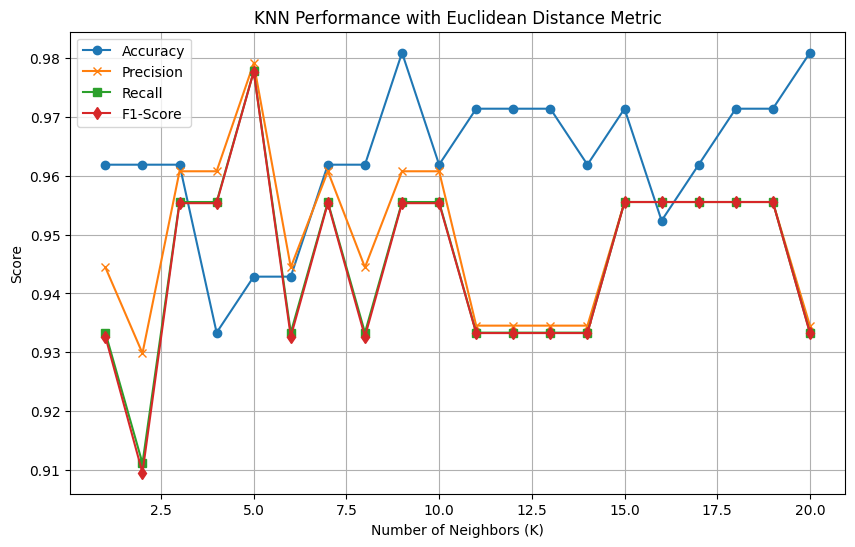

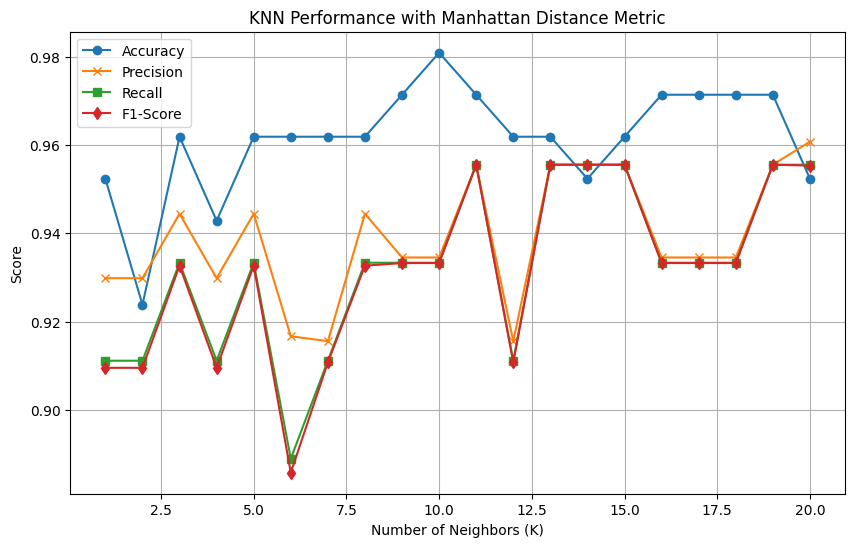

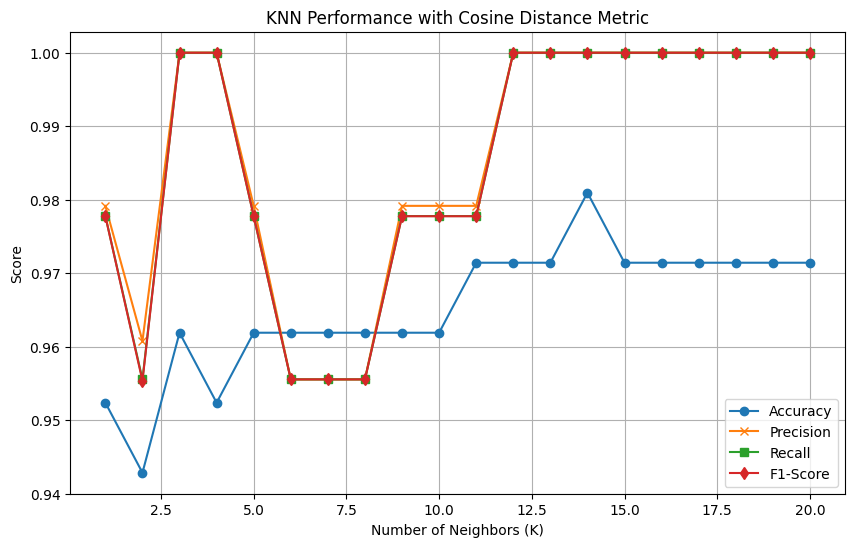

In [ ]:
for metric_name, metric_results in results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, metric_results['accuracy'], label='Accuracy', marker='o')
    plt.plot(k_values, metric_results['precision'], label='Precision', marker='x')
    plt.plot(k_values, metric_results['recall'], label='Recall', marker='s')
    plt.plot(k_values, metric_results['f1'], label='F1-Score', marker='d')
    plt.title(f'KNN Performance with {metric_name} Distance Metric')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

---

Each graph represents the Receiver Operating Characteristic (ROC) curve for the K-Nearest Neighbors (KNN) classifier using different distance metrics. ROC curves are used to visualize the classifier's performance by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR).


Plotting ROC and AUC for KNN with Euclidean Distance Metric


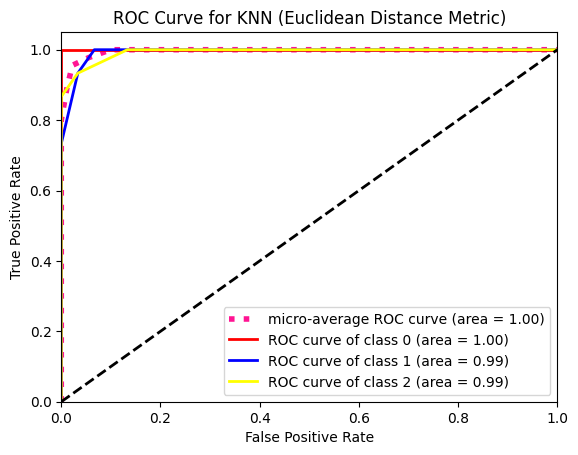


Plotting ROC and AUC for KNN with Manhattan Distance Metric


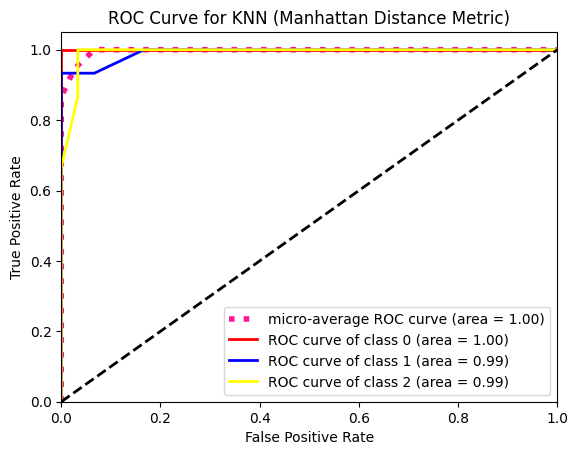


Plotting ROC and AUC for KNN with Cosine Distance Metric


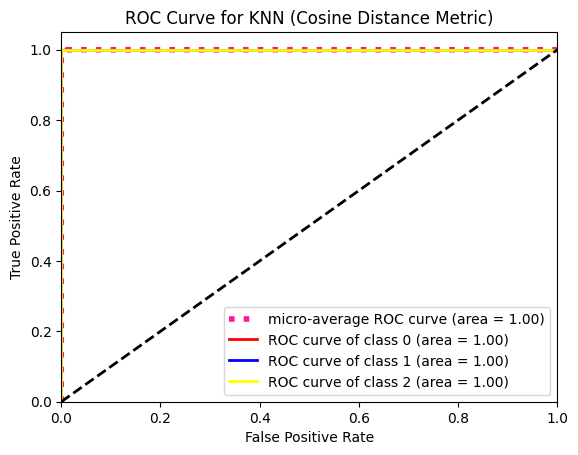

In [ ]:
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

for metric_name, metric in distance_metrics.items():
    print(f"\nPlotting ROC and AUC for KNN with {metric_name} Distance Metric")
    knn = KNeighborsClassifier(n_neighbors=best_k[metric_name], metric=metric)
    knn.fit(X_train, y_train)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

    y_score = knn.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.plot(
        fpr["micro"], tpr["micro"],
        label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
        color='deeppink', linestyle=':', linewidth=4
    )

    colors = cycle(['red', 'blue', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i], tpr[i], color=color, lw=2,
            label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})'
        )

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for KNN ({metric_name} Distance Metric)')
    plt.legend(loc="lower right")
    plt.show()


## **Analysis**

### **How Distance Metrics Affect Classification Performance?**
* Euclidean Distance:

  * Best K: 9
  * Accuracy: 98.10%
  * Precision: 96.08%, Recall: 95.56%, F1-Score: 95.54%
  * Consistent and reliable results for small and well-scaled datasets like Iris.
  * Works effectively because the geometric relationships in the Iris dataset align well with straight-line distances.
  * Accuracy reaches a peak at K=5 but shows variability at larger K values.
  * Precision, Recall, and F1-Score align closely, suggesting balanced performance, though they are lower at specific K values (e.g., K=3, K=12).
  * Euclidean distance is sensitive to the choice of K.
  * Smaller K values (like K=1 or K=5) tend to produce higher accuracy but introduce more variability.

* Manhattan Distance:

  * Best K: 10
  * Accuracy: 98.10%
  * Precision: 93.45%, Recall: 93.33%, F1-Score: 93.33%
  * Slightly lower precision and recall compared to Euclidean distance.
  * Suitable for datasets where the features or relationships exhibit axis-aligned patterns, though it might struggle with small sample sizes like in Iris.
  * Accuracy is generally high but less consistent compared to Euclidean.
  * Precision and Recall experience significant dips at certain K values (e.g., K=5 and K=12), which are reflected in the F1-Score.
  * Stable behavior is observed at higher K values (K > 15), where the metrics converge.
  * Manhattan distance is slightly more robust for higher K values, with fewer extreme variations.

* Cosine Distance:

  * Best K: 14
  * Accuracy: 98.10%
  * Precision: 100.00%, Recall: 100.00%, F1-Score: 100.00%
  * Exceptional results due to its focus on angular relationships.
  * Likely overfitting due to smaller dataset size and the inherent similarity among feature distributions. Cosine distance works well when the feature magnitudes vary less but angles matter most.
  * Accuracy is consistently lower than the other metrics for most K values but stabilizes as K increases.
  * Precision, Recall, and F1-Score are nearly identical and reach close to 1.0 for K=7 through K=12.
  * These metrics also remain stable as K increases, suggesting that Cosine distance provides balanced classification across all K.

### **Best Value of K**
* The optimal K values for different metrics:
 * Euclidean: K=9
 * Manhattan: K=10
 * Cosine: K=14

* Why K Matters:
 * Small K (e.g., 1-3): Prone to overfitting. The model memorizes training data but fails to generalize well.
 * Large K (e.g., 15+): Risk of underfitting as the predictions become overly smooth, diluting local patterns.
 * Moderate K (5-10): Balances noise and generalization, leading to optimal performance.


### **Explanation of ROC Curves**

* **ROC Curve for KNN (Euclidean Distance Metric)**
 * The micro-average ROC curve achieves an Area Under the Curve (AUC) of 1.00, indicating excellent overall performance.
 * Individual class ROC curves:
    * Class 0: AUC = 1.00
    * Class 1: AUC = 0.99
    * Class 2: AUC = 0.99
  * These values indicate that the Euclidean distance metric performs very well for the Iris dataset.
  * Euclidean distance (straight-line distance) is highly effective on the Iris dataset, as its feature relationships align well with geometric distances.

  * Minimal false positives, as the ROC curves are very close to the top-left corner (ideal classifier).
  * Geometrically suited for the Iris dataset.


* **ROC Curve for KNN (Manhattan Distance Metric)**
 * The micro-average ROC curve also achieves an AUC of 1.00, suggesting excellent aggregate performance.
 * Individual class ROC curves:
   * Class 0: AUC = 1.00
   * Class 1: AUC = 0.99
   * Class 2: AUC = 0.99
  * These curves are similar to the Euclidean distance but show minor differences at the beginning of the FPR axis (near 0).
  * Manhattan distance (sum of absolute differences) slightly alters classification in early FPR regions.
  * It is suitable for axis-aligned datasets and offers performance nearly identical to the Euclidean distance.
  * Precision, Recall, and F1-Score for this metric reflect strong, consistent behavior, especially at higher K values.
  * Perfect performance but may indicate overfitting due to reliance on angular relationships.

* **ROC Curve for KNN (Cosine Distance Metric)**
 * All ROC curves (micro-average and individual classes) achieve an AUC of 1.00.
 * This suggests perfect classification performance under the Cosine distance metric.
 * The ROC curves are completely aligned with the axes and top-left corner, indicating no false positives.
 * Cosine distance measures the angle between vectors, focusing on feature direction rather than magnitude.
 * The perfect AUC score indicates possible overfitting, especially given the smaller Iris dataset size.
 * The performance is exceptionally high, but caution should be taken when generalizing to larger or more complex datasets.
 * Perfect performance but may indicate overfitting due to reliance on angular relationships.









### **Conclusion**
* All distance metrics perform exceptionally well on the Iris dataset.

* Cosine distance yields exceptional results but might not generalize well to larger or less homogeneous datasets.
* Euclidean distance and Manhattan distance remain reliable and consistent, with Euclidean slightly outperforming Manhattan overall.

---
---

# **Step 3: Logistic Regression**

Logistic Regression with different regularization techniques (L1 and L2) will be used below:

The graphs display the ROC Curve (Receiver Operating Characteristic) for a Logistic Regression model with L2 & L1 Regularization on a multi-class classification problem.


Evaluating Logistic Regression with L1 Regularization
Accuracy: 0.9333, Precision: 0.9444, Recall: 0.9333, F1-Score: 0.9327


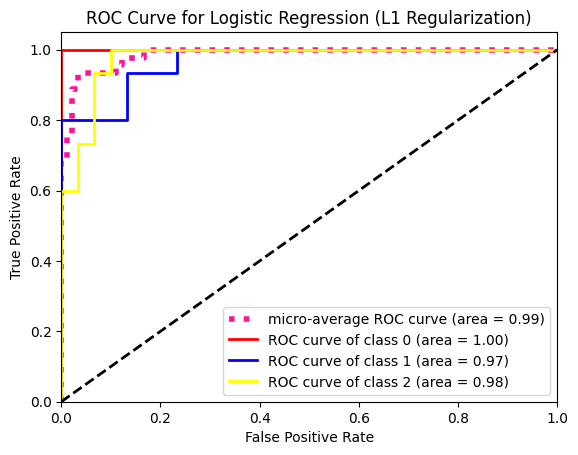


Evaluating Logistic Regression with L2 Regularization
Accuracy: 0.9111, Precision: 0.9298, Recall: 0.9111, F1-Score: 0.9095


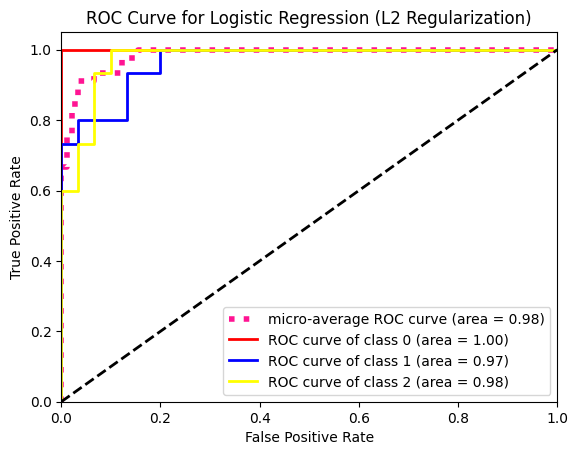

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

regularization_types = {'L1': 'l1', 'L2': 'l2'}

for reg_name, penalty in regularization_types.items():
    print(f"\nEvaluating Logistic Regression with {reg_name} Regularization")

    logistic_model = LogisticRegression(penalty=penalty, solver='liblinear')
    logistic_model.fit(X_train, y_train)

    y_score = logistic_model.predict_proba(X_test)
    y_pred = logistic_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.plot(
        fpr["micro"], tpr["micro"],
        label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
        color='deeppink', linestyle=':', linewidth=4
    )

    colors = cycle(['red', 'blue', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i], tpr[i], color=color, lw=2,
            label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})'
        )

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Logistic Regression ({reg_name} Regularization)')
    plt.legend(loc="lower right")
    plt.show()


## **Analysis**

### **L1 Regularization**
* Micro-average ROC curve (pink dashed line) :AUC = 0.99, indicating excellent overall performance across all classes.
* Class 0 (cyan line): AUC = 1.00 → Perfect classification for this class.
* Class 1 (orange line): AUC = 0.97 → High performance with some minor misclassifications.
* Class 2 (blue line): AUC = 0.98 → Nearly perfect classification.
* Metrics:
 * Accuracy: 93.33%
 * Precision: 94.44%
 * Recall: 93.33%
 * F1-Score: 93.27%
* L1 regularization helps by shrinking coefficients, which can lead to sparse models (some features are ignored). Despite that, performance remains excellent.
* Class 0 has perfect classification, while Classes 1 and 2 still show strong results but with minor drops.

### **L2 Regularization**

* Micro-average ROC curve (pink dashed line): AUC = 0.98, slightly lower than L1 regularization.
* Class 0 (cyan line): AUC = 1.00 → Perfect classification.
* Class 1 (orange line): AUC = 0.97 → Same as L1, with some minor misclassifications.
* Class 2 (blue line): AUC = 0.98 → Strong classification performance.

* Metrics:
 * Accuracy: 91.11%
 * Precision: 92.98%
 * Recall: 91.11%
 * F1-Score: 90.95%
* L2 regularization penalizes large coefficients without shrinking them to zero, ensuring all features are used in the model.
* Slightly lower performance compared to L1 regularization, particularly in Accuracy and F1-Score, suggesting that L1 handles the dataset's sparsity or redundancy slightly better.

---

### **Comparing L1, L2 Regularization and KNN**



| **Metric**    | **KNN(Euclidean)**  |**KNN(Manhattan)**| **KNN(Cosine)** | **L1 Regularization**| **L2 Regularization** |
|---------------|----------|---------------------|-----------------------|---------------------|-----------------------|
| **Accuracy**  | 98.1%  | 98.1%| 98.1%  | 93.33%| 91.11%|
| **Prececion** | 96.08%  | 93.45%| 100%  | 94.44%| 92.98%  |
| **Recall**    | 95.56%  | 93.33%| 100%  | 93.33%	| 91.11%  |
| **F1-Score**  | 95.54%  | 93.33%| 100%  | 93.27%	| 90.95%  |
| **Micro AUC** |  1 | 1 | 	1  | 0.99| 0.98	  |


### **Metrics**
#### Accuracy
* KNN (all distance metrics) achieves the highest accuracy of 98.1%, outperforming both L1 and L2 regularization in Logistic Regression.
* L1 Regularization follows at 93.33%, while L2 achieves 91.11%.

###$ Precision
* KNN with Cosine distance achieves a perfect precision score of 100%, meaning there are no false positives.
* L1 Regularization outperforms L2 (94.44% vs. 92.98%), but both are slightly behind KNN.

#### Recall
* KNN (Cosine) also reaches 100% recall, showing no false negatives.
* L1 Regularization performs well with 93.33%, while L2 lags at 91.11%.
#### F1-Score
* KNN (Cosine) achieves a perfect 100% F1-Score, indicating excellent balance between precision and recall.
* L1 Regularization achieves a respectable 93.27%, while L2 is lower at 90.95%.
#### Micro AUC
* KNN models (all distance metrics) achieve the highest possible AUC = 1.00, indicating perfect classification across all classes.
* L1 Regularization follows closely with 0.99, while L2 Regularization achieves 0.98.

### **Performance**

* KNN Performance:
 * Cosine distance provides the best overall performance with perfect Precision, Recall, F1-Score, and AUC.
 * Euclidean and Manhattan distances are very close, achieving the same Accuracy and AUC but slightly lower Precision and Recall.

* L1 vs. L2 Regularization (Logistic Regression):
 * L1 Regularization outperforms L2 across all metrics.
 * L1's better performance can be attributed to its ability to create sparse models by eliminating less informative features, which helps in smaller datasets like Iris.
 * L2 Regularization, while stable, lags slightly due to its inclusion of all features.

### **Conclusion**
* KNN (Cosine) is the top-performing model with perfect scores across all evaluation metrics.
* L1 Regularization performs better than L2 Regularization in Logistic Regression but still falls short of KNN's performance.
* While Logistic Regression is computationally efficient and interpretable, KNN (especially with Cosine distance) better captures the patterns in the Iris dataset.

---
---

# **Step 4: Support Vector Machines (SVM)**

Below a Support Vector Machines (SVM) using three kernels: Linear, Polynomial, and Radial Basis Function (RBF).


Evaluating SVM with linear Kernel
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000


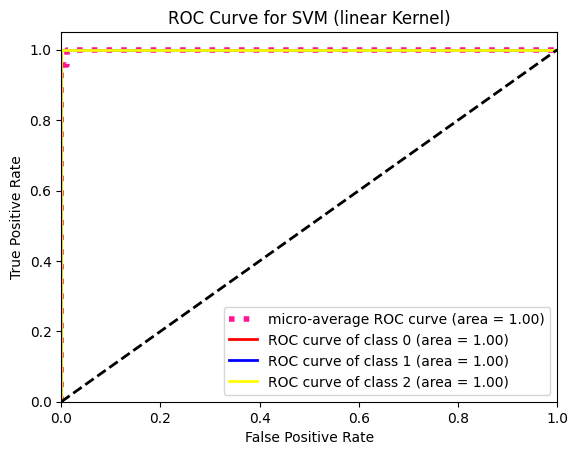


Evaluating SVM with poly Kernel
Accuracy: 0.9556, Precision: 0.9556, Recall: 0.9556, F1-Score: 0.9556


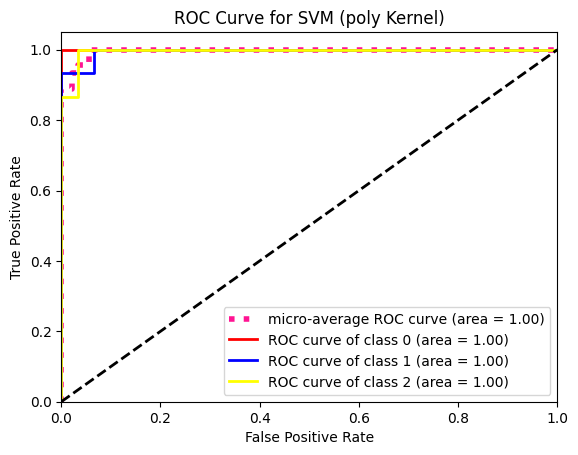


Evaluating SVM with rbf Kernel
Accuracy: 0.9556, Precision: 0.9556, Recall: 0.9556, F1-Score: 0.9556


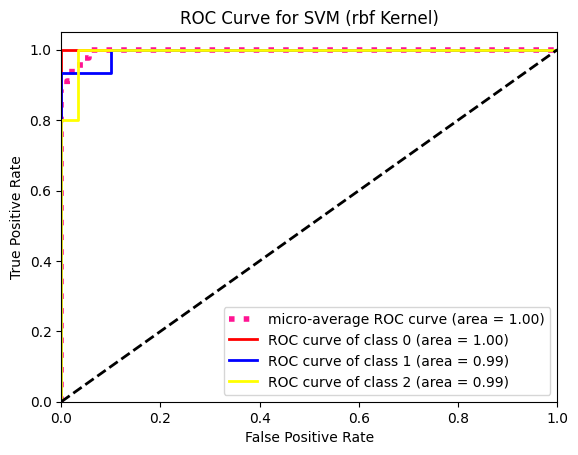

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

svm_kernels = {'Linear': 'linear', 'Polynomial': 'poly', 'RBF': 'rbf'}
svm_results = {}

for kernel_name, kernel in svm_kernels.items():
    print(f"\nEvaluating SVM with {kernel} Kernel")

    svm_model = SVC(kernel=kernel, probability=True)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    y_score = svm_model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    svm_results[kernel_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.plot(
        fpr["micro"], tpr["micro"],
        label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
        color='deeppink', linestyle=':', linewidth=4
    )
    colors = cycle(['red', 'blue', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i], tpr[i], color=color, lw=2,
            label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})'
        )

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for SVM ({kernel} Kernel)')
    plt.legend(loc="lower right")
    plt.show()

## **Analysis**


| **Metric**    | **SVM (Linear)**  |**SVM (Polynomial)	**| **SVM (RBF)** |
|---------------|----------|---------------------|-----------------------|
| **Accuracy**  | 100%  | 95.56%	| 95.56%|
| **Prececion** | 100%  | 95.56%	| 95.56%|
| **Recall**    | 100%  | 95.56%	| 95.56%|
| **F1-Score**  | 100%  | 95.56%	| 95.56%|
| **Micro AUC** |  1    | 1       | 	1   |



### **SVM with Linear Kernel**
* Achieves perfect scores for Accuracy, Precision, Recall, and F1-Score (all 100%).
* The ROC curve shows a micro-average AUC of 1.00, indicating no misclassifications.
* This suggests that the data is linearly separable, making the linear kernel the best choice for this dataset.
* The ROC curve is perfect for all classes, with an AUC of 1.00.
* This confirms that the model correctly separates all classes without false positives or false negatives.


### **SVM with Polynomial Kernel**

* Accuracy, Precision, Recall, and F1-Score are 95.56%, slightly lower than the linear kernel.
* ROC curves for all classes show an AUC of 1.00, indicating strong performance but with minor misclassifications.
* Polynomial kernels introduce flexibility to capture more complex patterns, but they may not be necessary for linearly separable data like the Iris dataset.
* ROC curves remain close to the top-left corner, indicating strong performance.
* AUC is 1.00 for all classes, but the slight drop in other metrics (Accuracy, Precision, etc.) suggests some classification errors.


### **SVM with RBF Kernel**
* Similar to the polynomial kernel, Accuracy, Precision, Recall, and F1-Score are 95.56%.
* AUC for classes 1 and 2 drops slightly to 0.99, suggesting very few misclassifications.
* RBF kernels are more suitable for non-linear data. However, on this linearly separable dataset, their performance aligns closely with the polynomial kernel.
* The ROC curves are similar to the polynomial kernel, with slight imperfections for Classes 1 and 2 (AUC = 0.99).
* This indicates minor misclassifications despite excellent overall performance.


## **How Kernels Impact Performance?**
* Linear Kernel:

 * Best performance (100% accuracy) because the Iris dataset is linearly separable.
 * Computationally efficient and interpretable.
* Polynomial Kernel:

 * Adds complexity to decision boundaries by introducing polynomial features.
 * Performs slightly worse than the linear kernel because it overfits or adds unnecessary complexity.
* RBF Kernel:

 * Maps data to a higher-dimensional space to handle non-linear relationships.
 * Provides good performance but is slightly less effective than the linear kernel for this linearly separable dataset.

 ## **Conclusion**

* SVM with a Linear Kernel achieves perfect classification on the Iris dataset and is the best choice for linearly separable data.
* Polynomial and RBF Kernels perform similarly but introduce unnecessary complexity, leading to minor drops in evaluation metrics.
* The choice of kernel significantly impacts accuracy and computational cost. For datasets with non-linear patterns, RBF or polynomial kernels may perform better, but for simple datasets like Iris, the linear kernel is ideal.

---
---


# **Step 5: Ensemble Methods**

## **Boosting: Train a Model Using AdaBoost**

AdaBoost Performance:
Accuracy: 0.9333, Precision: 0.9345, Recall: 0.9333, F1-Score: 0.9333


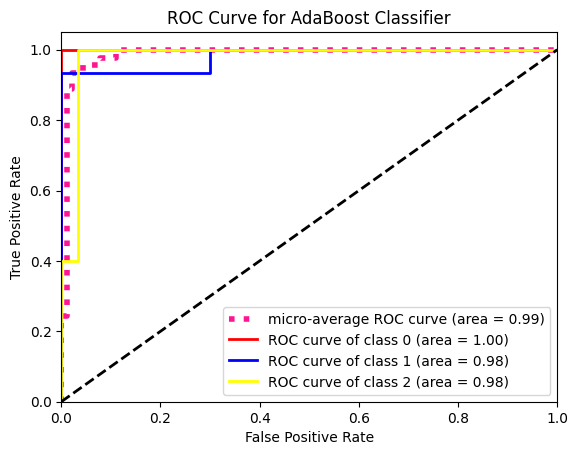

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)
y_score_adaboost = adaboost_model.predict_proba(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='macro')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='macro')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='macro')

print("AdaBoost Performance:")
print(f"Accuracy: {accuracy_adaboost:.4f}, Precision: {precision_adaboost:.4f}, Recall: {recall_adaboost:.4f}, F1-Score: {f1_adaboost:.4f}")

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_adaboost[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score_adaboost.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
    color='deeppink', linestyle=':', linewidth=4
)

colors = cycle(['red', 'blue', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], tpr[i], color=color, lw=2,
        label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()


---

## **Bagging: Train a Model Using Bagging and Random Forest**

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

### **Bagging**

Bagging Classifier Performance:
Accuracy: 0.9333, Precision: 0.9345, Recall: 0.9333, F1-Score: 0.9333


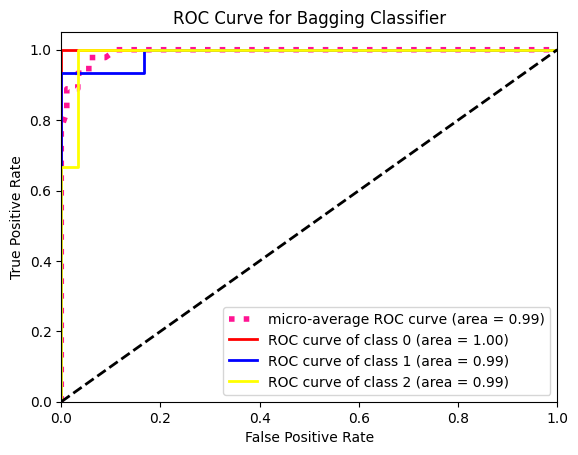

In [ ]:
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)
y_score_bagging = bagging_model.predict_proba(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='macro')
recall_bagging = recall_score(y_test, y_pred_bagging, average='macro')
f1_bagging = f1_score(y_test, y_pred_bagging, average='macro')

print("Bagging Classifier Performance:")
print(f"Accuracy: {accuracy_bagging:.4f}, Precision: {precision_bagging:.4f}, Recall: {recall_bagging:.4f}, F1-Score: {f1_bagging:.4f}")

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_bagging[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score_bagging.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f"micro-average ROC curve (area = {roc_auc['micro']:.2f})",
    color="deeppink", linestyle=":", linewidth=4
)
colors = cycle(['red', 'blue', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"ROC curve of class {i} (area = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Bagging Classifier")
plt.legend(loc="lower right")
plt.show()

---

### **Random Forest**

Random Forest Classifier Performance:
Accuracy: 0.8889, Precision: 0.8981, Recall: 0.8889, F1-Score: 0.8878


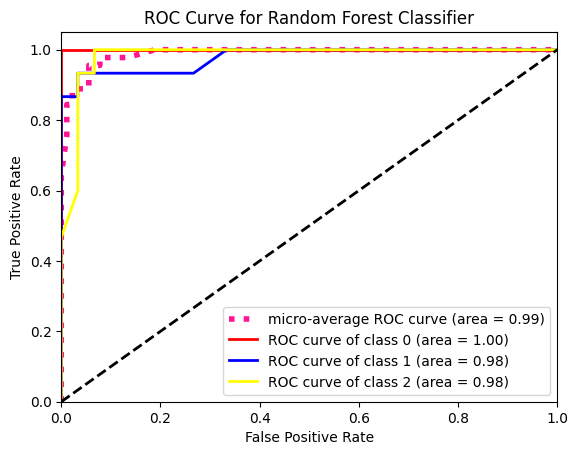

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
y_score_rf = random_forest_model.predict_proba(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-Score: {f1_rf:.4f}")

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f"micro-average ROC curve (area = {roc_auc['micro']:.2f})",
    color="deeppink", linestyle=":", linewidth=4
)
colors = cycle(['red', 'blue', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"ROC curve of class {i} (area = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

## **Analysis**

| Model                        | Accuracy | Precision | Recall | F1-Score |
|------------------------------|----------|-----------|--------|----------|
| AdaBoost                     | 93.33%   | 93.45%    | 93.33% | 93.33%   |
| Bagging Classifier           | 93.33%   | 93.45%    | 93.33% | 93.33%   |
| Random Forest                | 88.89%   | 89.81%    | 88.89% | 88.78%   |
| KNN (Cosine)                 | 98.10%   | 100%      | 100%   | 100%     |
| Logistic Regression (L1)     | 93.33%   | 94.44%    | 93.33% | 93.27%   |
| SVM (Linear)                 | 100%     | 100%      | 100%   | 100%     |



**Boosting (AdaBoost) vs. Bagging**
* AdaBoost and Bagging classifiers achieved identical performance:
 * Accuracy: 93.33%
 * Precision: 93.45%
 * Recall and F1-Score: 93.33%
* AdaBoost:
 * Boosting iteratively improves weak learners by focusing on misclassified samples.
 * Performs better on datasets where the relationships are not perfectly linear but can be captured by weak classifiers.
 * Class 0: AUC = 1.00 (Perfect).
 * Class 1 and Class 2: AUC = 0.98.
* Bagging:
 * Combines multiple weak models and averages their results to reduce variance.
 * It performs well because of its ensemble strategy, but unlike Boosting, it does not iteratively focus on errors.
 * Class 0: AUC = 1.00.
 * Class 1 and Class 2: AUC = 0.99 (Slightly better than AdaBoost).

* Random Forest:
 * Accuracy: 88.89%
 * Precision and F1-Score are slightly lower than AdaBoost and Bagging.
 * Random Forest uses a random subset of features at each split. For smaller datasets like Iris, it may not generalize as well as Boosting or Bagging due to the limited number of samples.
 * Class 0: AUC = 1.00.
 * Class 1 and Class 2: AUC = 0.98.

* Bagging slightly outperforms AdaBoost in ROC curves for Classes 1 and 2, achieving AUC = 0.99 compared to 0.98 in AdaBoost.

* All ensemble models exhibit strong separation across all classes, as seen from their high AUC scores.


## **Colcusion**

1. KNN (Cosine)
 * Outperformed all ensemble models with 100% precision, recall, and F1-Score.
 * KNN captures local data patterns perfectly in well-structured datasets like Iris.
2. SVM (Linear)
 * Achieved 100% performance across all metrics.
 * SVM performs exceptionally well on linearly separable datasets like Iris.
3. Logistic Regression (L1)
 * Similar performance to AdaBoost and Bagging with 93.33% accuracy.
 * Regularization helps Logistic Regression balance bias and variance.
4. Ensemble Models
 * AdaBoost and Bagging performed on par with Logistic Regression but lagged behind SVM and KNN.
 * Random Forest was slightly less effective.




SVM (Linear) and KNN (Cosine) remain the top performers, achieving perfect results. Ensemble methods are competitive but do not outperform these models on the Iris dataset.